<a href="https://colab.research.google.com/github/irmainnayah/2025_pengolahan_citra/blob/main/Pengolahan_citra_operasi_deteksi_tepi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ini hasilnya


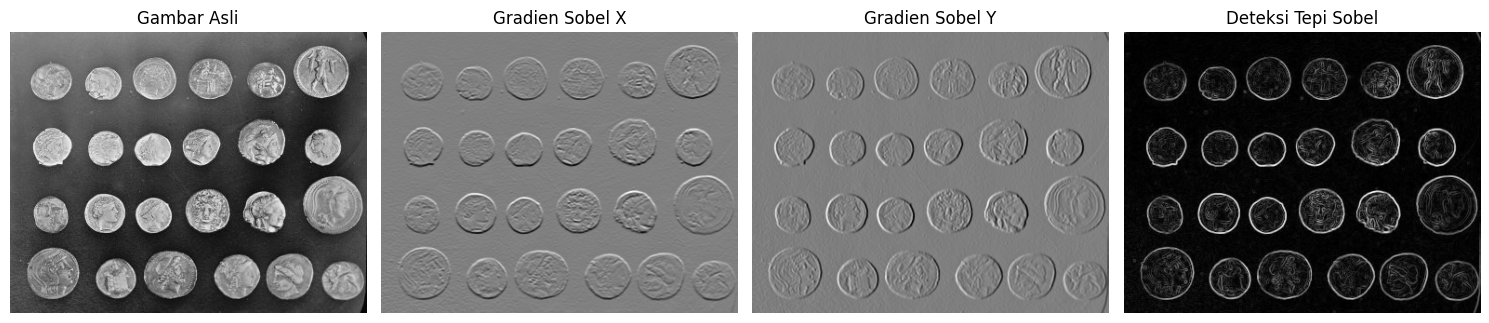

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters
# Ambil gambar bawaan dari skimage
image = data.coins() # Menggunakan gambar koin bawaan dari skimage
gray_image = color.rgb2gray(image) if image.ndim == 3 else image
# Konversi ke grayscale jika perlu

# Hitung gradien menggunakan Operator Sobel
sobel_x = filters.sobel_h(gray_image)
# Sobel di arah horizontal
sobel_y = filters.sobel_v(gray_image)
# Sobel di arah vertikal
sobel_edge = filters.sobel(gray_image)
# Kombinasi keduanya

# Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradien Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradien Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")
print('ini hasilnya')

plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

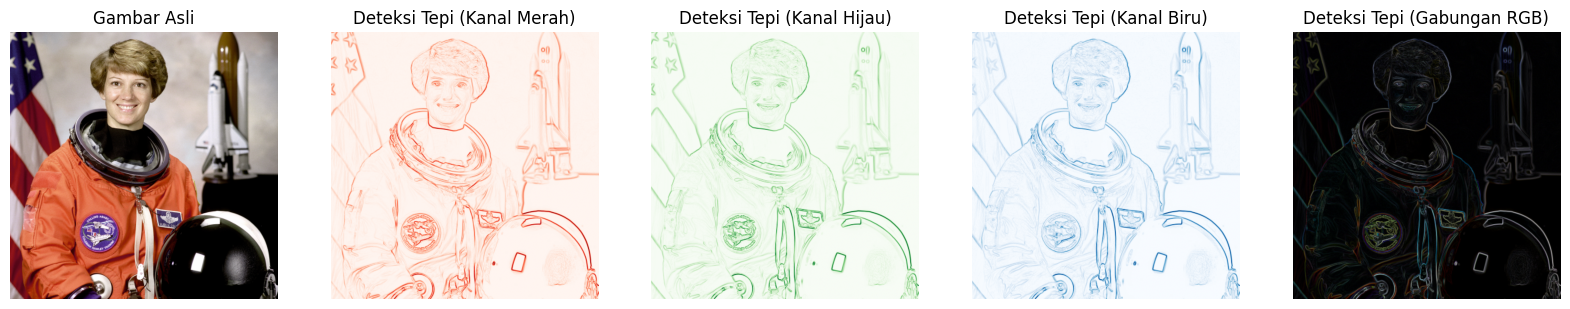

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage (gambar astronaut berwarna)
image = data.astronaut()
# Gambar berwarna bawaan dari skimage
# Pisahkan kanal warna
red_channel = image[:, :, 0]
# Kanal merah
green_channel = image[:, :, 1]
# Kanal hijau
blue_channel = image[:, :, 2]
# Kanal biru

# Terapkan Operator Sobel pada masing-masing kanal warna
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

# Gabungkan hasil dengan mengambil rata-rata dari ketiga kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi Tepi (Kanal Merah)")
ax[1].axis("off")

ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi Tepi (Kanal Hijau)")
ax[2].axis("off")

ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi Tepi (Kanal Biru)")
ax[3].axis("off")

ax[4].imshow(sobel_color)
ax[4].set_title("Deteksi Tepi (Gabungan RGB)")
ax[4].axis("off")


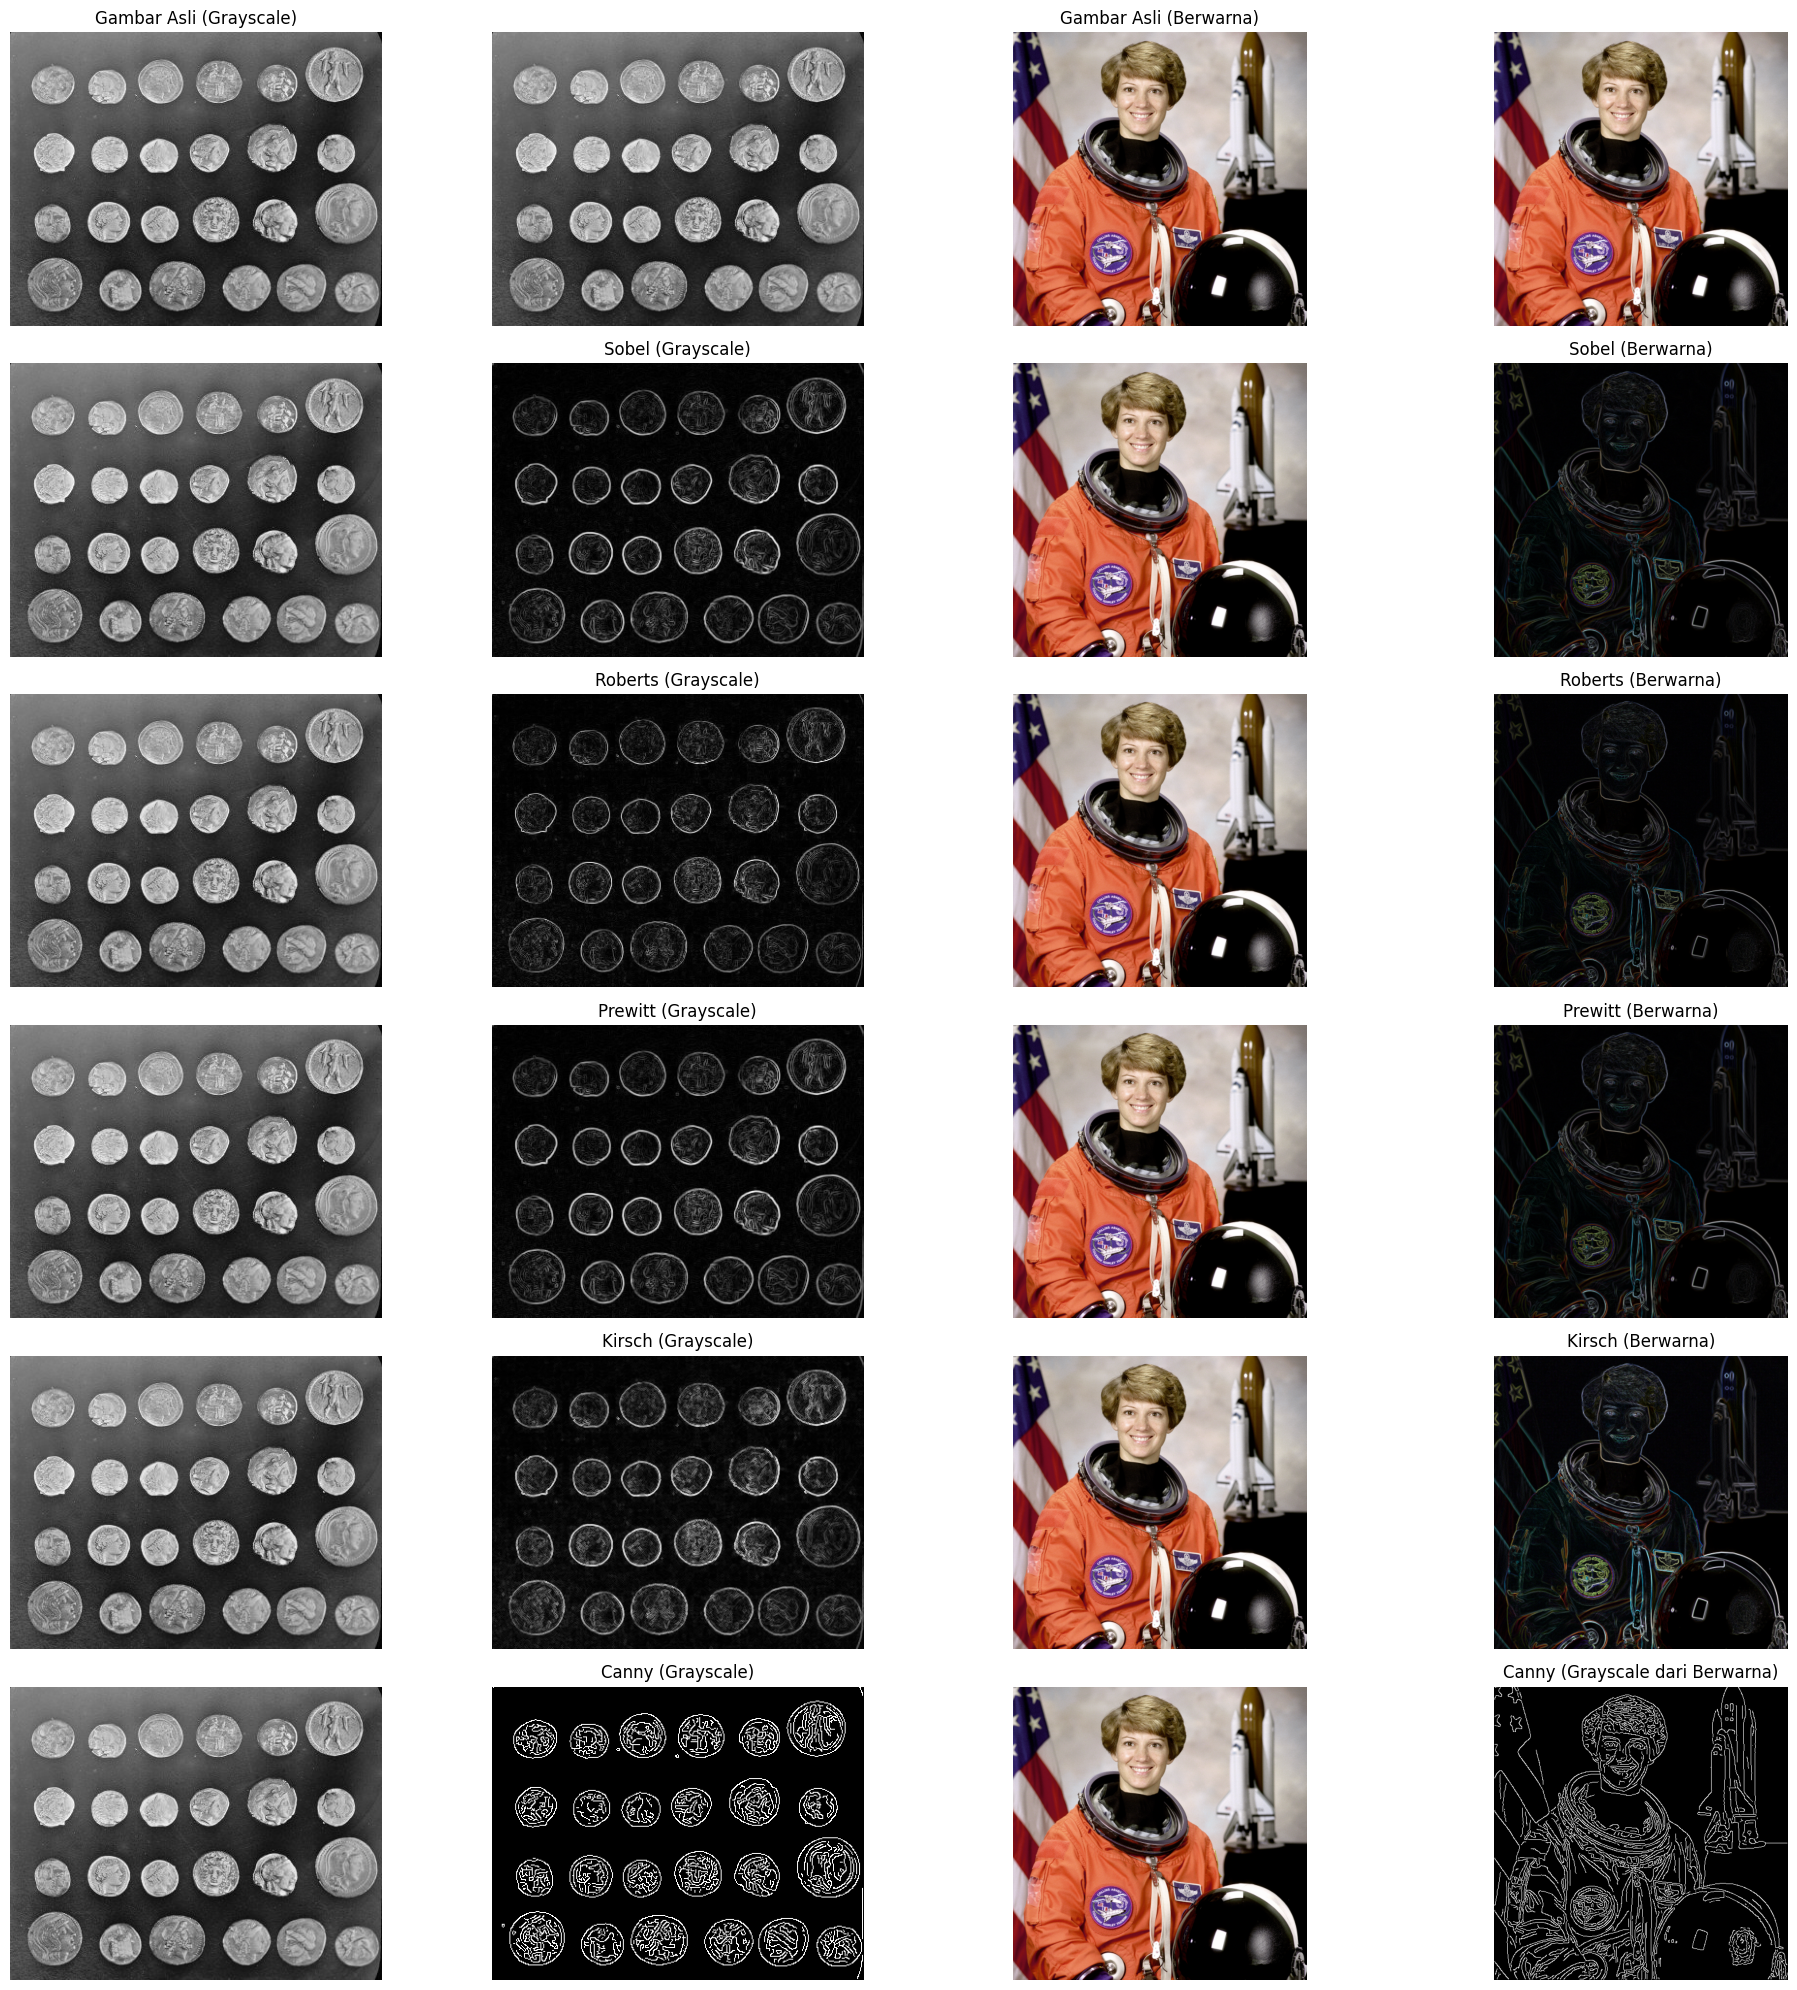

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature, color
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1 AMBIL GAMBAR GRAYSCALE & BERWARNA =====================
# Menggunakan gambar bawaan dari skimage
image_gray = data.coins()  # Gambar grayscale
image_color = data.astronaut()  # Gambar berwarna

# ===================== 2 TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3 VISUALISASI HASIL (FORMAT 4 KOLOM, 6 BARIS) =====================

fig, axes = plt.subplots(6, 4, figsize=(20, 20))
ax = axes.ravel()

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")
ax[1].imshow(image_gray, cmap='gray')  # Placeholder
ax[1].axis("off")
ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")
ax[3].imshow(image_color)  # Placeholder
ax[3].axis("off")

# ----- Baris 2: Sobel -----
ax[4].imshow(image_gray, cmap='gray')
ax[4].axis("off")
ax[5].imshow(sobel_gray, cmap='gray')
ax[5].set_title("Sobel (Grayscale)")
ax[5].axis("off")
ax[6].imshow(image_color)
ax[6].axis("off")
ax[7].imshow(sobel_color)
ax[7].set_title("Sobel (Berwarna)")
ax[7].axis("off")

# ----- Baris 3: Roberts -----
ax[8].imshow(image_gray, cmap='gray')
ax[8].axis("off")
ax[9].imshow(roberts_gray, cmap='gray')
ax[9].set_title("Roberts (Grayscale)")
ax[9].axis("off")
ax[10].imshow(image_color)
ax[10].axis("off")
ax[11].imshow(roberts_color)
ax[11].set_title("Roberts (Berwarna)")
ax[11].axis("off")

# ----- Baris 4: Prewitt -----
ax[12].imshow(image_gray, cmap='gray')
ax[12].axis("off")
ax[13].imshow(prewitt_gray, cmap='gray')
ax[13].set_title("Prewitt (Grayscale)")
ax[13].axis("off")
ax[14].imshow(image_color)
ax[14].axis("off")
ax[15].imshow(prewitt_color)
ax[15].set_title("Prewitt (Berwarna)")
ax[15].axis("off")

# ----- Baris 5: Kirsch -----
ax[16].imshow(image_gray, cmap='gray')
ax[16].axis("off")
ax[17].imshow(kirsch_gray, cmap='gray')
ax[17].set_title("Kirsch (Grayscale)")
ax[17].axis("off")
ax[18].imshow(image_color)
ax[18].axis("off")
ax[19].imshow(kirsch_color)
ax[19].set_title("Kirsch (Berwarna)")
ax[19].axis("off")

# ----- Baris 6: Canny -----
ax[20].imshow(image_gray, cmap='gray')
ax[20].axis("off")
ax[21].imshow(canny_gray, cmap='gray')
ax[21].set_title("Canny (Grayscale)")
ax[21].axis("off")
ax[22].imshow(image_color)
ax[22].axis("off")
ax[23].imshow(canny_color, cmap='gray')
ax[23].set_title("Canny (Grayscale dari Berwarna)")
ax[23].axis("off")

plt.tight_layout()
plt.show()


Saving parfume.jpg to parfume (2).jpg
✅ Gambar berhasil dimuat!


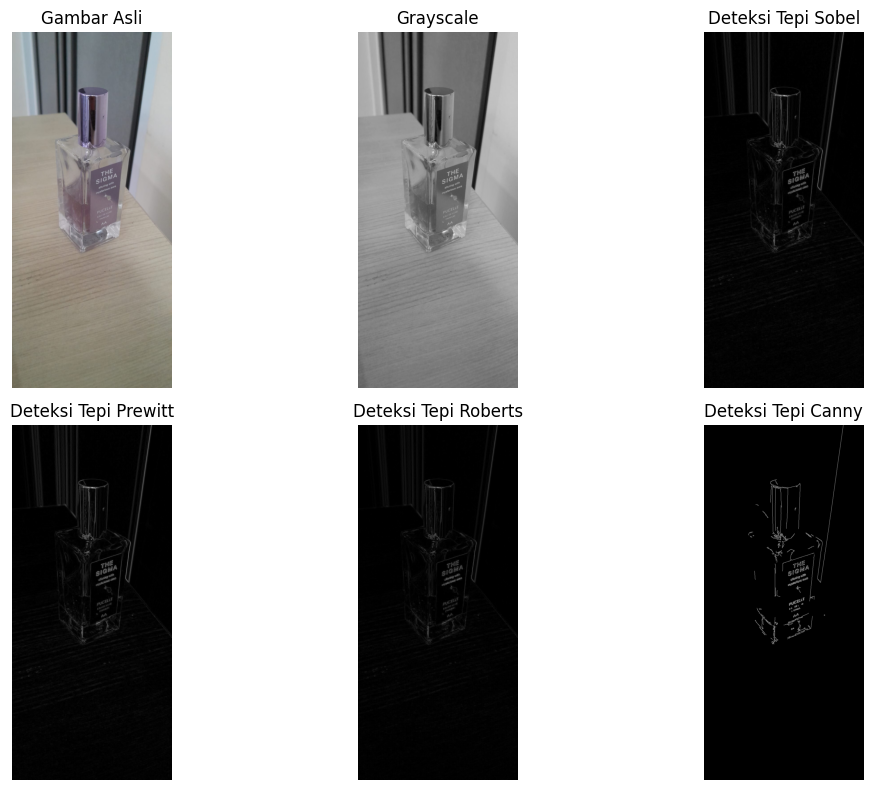

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from google.colab import files

# Upload gambar
uploaded = files.upload()

# Ambil nama file pertama yang diunggah
image_path = list(uploaded.keys())[0]

# Baca gambar dengan OpenCV
image = cv2.imread(image_path)

# Cek apakah gambar berhasil dimuat
if image is None:
    print("❌ Gagal membaca gambar! Pastikan file diupload dengan benar.")
else:
    print("✅ Gambar berhasil dimuat!")

    # Konversi ke RGB untuk tampilan di Matplotlib
    image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi dengan berbagai operator
    sobel_edges = filters.sobel(image_gray)
    prewitt_edges = filters.prewitt(image_gray)
    roberts_edges = filters.roberts(image_gray)
    canny_edges = cv2.Canny(image_gray, 100, 200)

    # Tampilkan hasil
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Gambar asli
    axes[0, 0].imshow(image_color)
    axes[0, 0].set_title("Gambar Asli")
    axes[0, 0].axis("off")

    # Grayscale
    axes[0, 1].imshow(image_gray, cmap="gray")
    axes[0, 1].set_title("Grayscale")
    axes[0, 1].axis("off")

    # Sobel
    axes[0, 2].imshow(sobel_edges, cmap="gray")
    axes[0, 2].set_title("Deteksi Tepi Sobel")
    axes[0, 2].axis("off")

    # Prewitt
    axes[1, 0].imshow(prewitt_edges, cmap="gray")
    axes[1, 0].set_title("Deteksi Tepi Prewitt")
    axes[1, 0].axis("off")

    # Roberts
    axes[1, 1].imshow(roberts_edges, cmap="gray")
    axes[1, 1].set_title("Deteksi Tepi Roberts")
    axes[1, 1].axis("off")

    # Canny
    axes[1, 2].imshow(canny_edges, cmap="gray")
    axes[1, 2].set_title("Deteksi Tepi Canny")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()
